In [17]:
from kilosort import run_kilosort
from kilosort import io
import numpy as np
import os
import glob
import spikeinterface.extractors as se
from probeinterface import ProbeGroup, write_prb
from probeinterface.plotting import plot_probe

#######################################################################
animal_ID = 'FNT098'
session_ID = '2024-03-11T11-24-46'

base_folder = r"Z:\projects\FlexiVexi\behavioural_data"
session_folder = os.path.join(base_folder, animal_ID, session_ID)
output_folder = os.path.join(session_folder, 'kilosort4')

#######################################################################

n_chan_bin = 384
fs = 30000

In [5]:
# Get path to Open-Ephys Record Node within session folder
matching_files = glob.glob(os.path.join(session_folder, '**', 'settings.xml'), recursive=True)
if matching_files:
    # Get the first matching file
    first_matching_file = matching_files[0]
  
    # Get the directory of the first matching file
    path_to_recording = os.path.dirname(first_matching_file)
else:
    print("No 'settings.xml' file found in the specified path.")
    
# Get recording from open ephys
recording = se.read_openephys(folder_path=path_to_recording, stream_name = 'Record Node 102#Neuropix-PXI-100.ProbeA')

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_contact_ids', '_contact_plane_axes', '_contact_positions', '_contact_shape_params', '_contact_shapes', '_dump_attr_names', '_probe_group', '_shank_ids', 'add_probe_to_zarr_group', 'annotate', 'annotate_contacts', 'annotations', 'check_annotations', 'contact_annotations', 'contact_ids', 'contact_plane_axes', 'contact_positions', 'contact_shape_params', 'contact_shapes', 'copy', 'create_auto_shape', 'device_channel_indices', 'from_dataframe', 'from_dict', 'from_numpy', 'from_zarr', 'from_zarr_group', 'get_contact_count', 'get_contact_vertices', 'get_shank_count', 'get_shanks', 'get_slice', 'get_title', 'manufacturer', 'model_name', 'move', 'name',

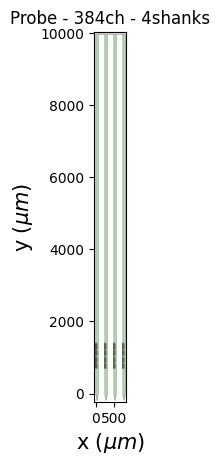

In [10]:
# get probe
probe = recording.get_probe()
pg = ProbeGroup()
pg.add_probe(probe)

# Write probe file
write_prb(output_folder, pg)

plot_probe(probe)

In [14]:
# Convert raw data to binary
dtype = np.int16
filename, N, c, s, fs, probe_path = io.spikeinterface_to_binary(
    recording, output_folder, data_name='data.bin', dtype=dtype,
    chunksize=60000, export_probe=True, probe_name='probe.prb'
    )

Loading recording with SpikeInterface...
number of samples: 104247582
number of channels: 384
numbef of segments: 1
sampling rate: 30000.0
dtype: int16
Converting 1738 data chunks with a chunksize of 60000 samples...
20 of 1738 chunks converted...
20 of 1738 chunks converted...
20 of 1738 chunks converted...
20 of 1738 chunks converted...
38 of 1738 chunks converted...
40 of 1738 chunks converted...
40 of 1738 chunks converted...
40 of 1738 chunks converted...
58 of 1738 chunks converted...
59 of 1738 chunks converted...
60 of 1738 chunks converted...
60 of 1738 chunks converted...
61 of 1738 chunks converted...
79 of 1738 chunks converted...
80 of 1738 chunks converted...
80 of 1738 chunks converted...
80 of 1738 chunks converted...
80 of 1738 chunks converted...
80 of 1738 chunks converted...
96 of 1738 chunks converted...
99 of 1738 chunks converted...
100 of 1738 chunks converted...
102 of 1738 chunks converted...
118 of 1738 chunks converted...
119 of 1738 chunks converted...
120 

In [25]:
from kilosort import run_kilosort


# NOTE: 'n_chan_bin' is a required setting, and should reflect the total number
#       of channels in the binary file, while probe['n_chans'] should reflect
#       the number of channels that contain ephys data. In many cases these will
#       be the same, but not always. For example, neuropixels data often contains
#       385 channels, where 384 channels are for ephys traces and 1 channel is
#       for some other variable. In that case, you would specify
#       'n_chan_bin': 385.
settings = {'fs': fs, 'n_chan_bin': n_chan_bin}

# Specify probe configuration.
assert probe_path is not None, 'No probe information exported by SpikeInterface'
probe_path = os.path.join(output_folder, 'probe.prb')
probe = io.load_probe(probe_path)

# This command will both run the spike-sorting analysis and save the results to
# `DATA_DIRECTORY`.
ops, st, clu, tF, Wall, similar_templates, is_ref, est_contam_rate = run_kilosort(
    settings=settings, probe=probe, filename=filename
    )

Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
Using GPU for PyTorch computations. Specify `device` to change this.


c:\Users\Lab7\anaconda3\envs\kilosort4\lib\site-packages\kilosort\io.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_numpy.cpp:212.)
  X[:, self.nt : self.nt+nsamp] = torch.from_numpy(data).to(self.device).float()


Preprocessing filters computed in  78.67s; total  78.67s

computing drift
Re-computing universal templates from data.


c:\Users\Lab7\anaconda3\envs\kilosort4\lib\site-packages\threadpoolctl.py:1223: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
  2%|▏         | 28/1738 [16:30:32<1008:13:24, 2122.58s/it]


KeyboardInterrupt: 